#Mobile Price Dataset
## Võ Thành Hoàng Sơn - 19DH110660



#LAB1 - Dataset(Mobile Price Dataset)
-  Source: https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification
- Name: Mobile Price Classification
- Context:
  - Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.
  - He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.

  - Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.

- Problem: In this problem you do not have to predict actual price but a price range indicating how high the price is



## 1.1 Load dataset
- Dataset ulr: 1AvhQXsYbaLg9ZLGWhZir1C9lYQJgZg_D
- Folder tree:
  - Mobile Price Dataset
    + test.csv
    + train.csv
    

In [ ]:
url = 'https://drive.google.com/drive/folders/1AvhQXsYbaLg9ZLGWhZir1C9lYQJgZg_D?usp=sharing'
import gdown
gdown.download_folder(url)

Retrieving folder list


Processing file 1_fWtViL-QZf5zsQx4MW44VUiaHmjOMOl test.csv
Processing file 1ASxEE4V7gnixpe6RMTVSXBZMni1L--Vu train.csv
Building directory structure completed


Retrieving folder list completed
Building directory structure
Downloading...
From: https://drive.google.com/uc?id=1_fWtViL-QZf5zsQx4MW44VUiaHmjOMOl
To: /content/mobile_price_dataset/test.csv
100%|██████████| 63.9k/63.9k [00:00<00:00, 30.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ASxEE4V7gnixpe6RMTVSXBZMni1L--Vu
To: /content/mobile_price_dataset/train.csv
100%|██████████| 122k/122k [00:00<00:00, 27.5MB/s]
Download completed


['/content/mobile_price_dataset/test.csv',
 '/content/mobile_price_dataset/train.csv']

## 1.2 Import library


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
train = pd.read_csv('mobile_price_dataset/train.csv')
test = pd.read_csv('mobile_price_dataset/test.csv')

In [ ]:
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
test = test.drop(['id'],axis=1)
test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


**Nhận xét:** Sau khi hiển thị 5 dòng đầu của 2 tập dữ liệu
  - Tập test có thêm cột id khiến các cột không đồng đều.
  
**Phương pháp:**
  - Xóa cột id tại test dataset (để các cột đồng nhất giữa 2 dataset)

## 1.3 Explain dataset


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

**Nhận xét:**
  - Dataset có 19 features và một outcome
  - Dataset 2000 mẫu
  - Không chứa bất kì giá trị NaN, null
  - Tất cả điều là kiểu dữ liệu số: (int64, float64) cần phải phân loại dữ liệu

**Phân loại các features**
- Numerical: battery_power, clock_speed,pc ,int_memory, m_dep, mobile_wt, n_cores, pc, px_height, px_width, ram, sc_h, sc_w, talk_time.
- Categorical: blue, dual_sim, four_g, three_g, wifi, price_range, touch_screen




### Transform to categorical

In [ ]:
categorical = ['blue', 'dual_sim', 'four_g', 'three_g','touch_screen', 'wifi']
numerical = [ 'battery_power', 'clock_speed','pc' ,'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 
             'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']

def convert_type(df,columns,astype):
    for feature in columns:
        df[feature] = df[feature].astype(astype)
        
convert_type(train,categorical,'category')
convert_type(test,categorical[:-1],'category')

In [ ]:
#Describe Numeric
train.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0
pc,2000.0,9.91650,6.064315,0.0,5.00,10.0,15.00,20.0
px_height,2000.0,645.10800,443.780811,0.0,282.75,564.0,947.25,1960.0
px_width,2000.0,1251.51550,432.199447,500.0,874.75,1247.0,1633.00,1998.0


In [ ]:
#Describe Categoric
train.describe(include=['category'])

,blue,dual_sim,four_g,three_g,touch_screen,wifi
count,2000,2000,2000,2000,2000,2000
unique,2,2,2,2,2,2
top,0,1,1,1,1,1
freq,1010,1019,1043,1523,1006,1014


**Nhận xét:**
  - Giá trị min, max, std giữa các features kiểu numeric không đồng điều
  - Các fetures kiểu category điều có 2 loạ, số lương mỗi loại của từng features khá tương đồng (khoảng 1010) ngoại trừ three_g

**Phương pháp:**
  - Cần **Chuẩn hoá dữ liệu**

## 1.4 Visualize data

In [ ]:
sns.set()
sns.set_style('darkgrid')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


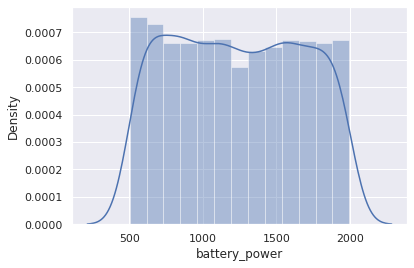

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


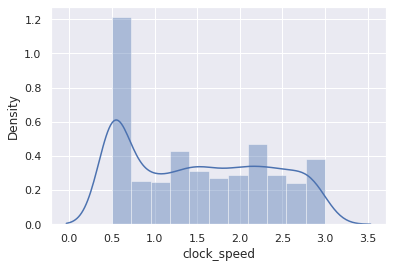

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


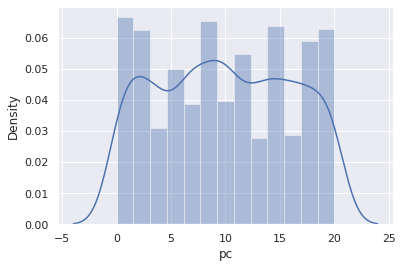

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


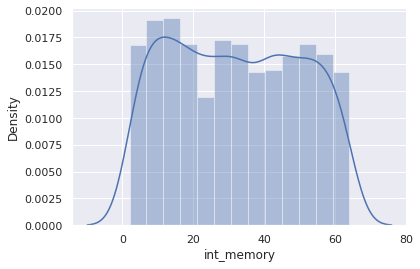

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


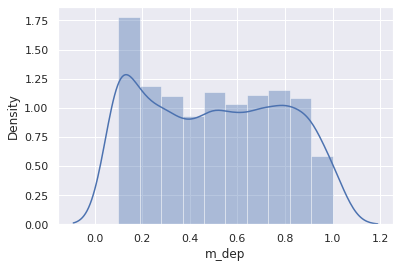

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


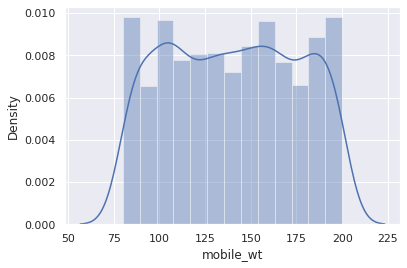

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


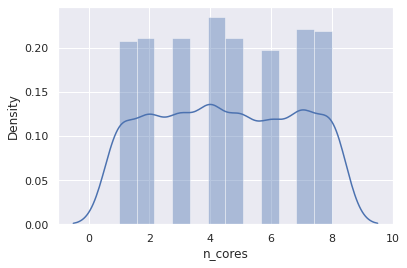

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


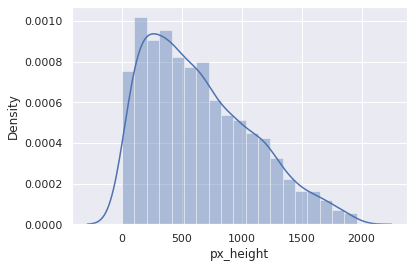

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


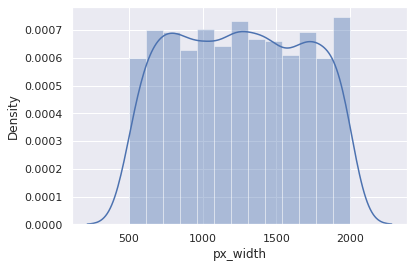

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


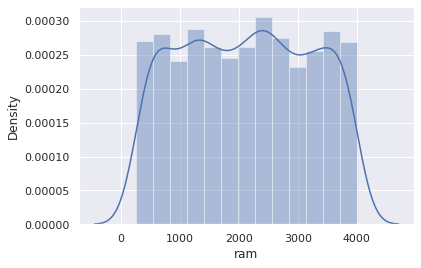

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


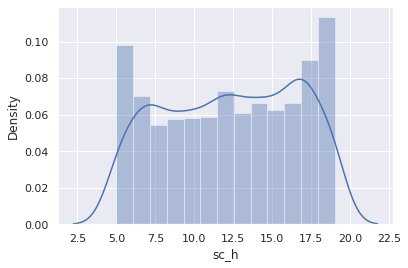

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


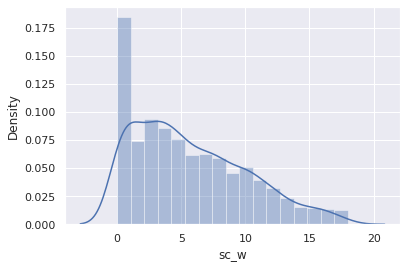

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


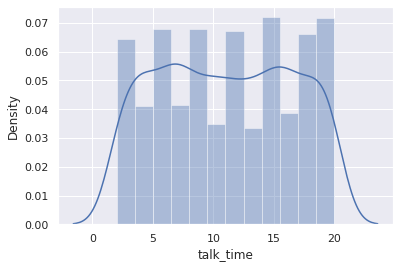

In [ ]:
for i in numerical:
  sns.distplot(train[i])
  plt.show()

**Các dạng phân phối:** Các features được hiển thị dưới 2 kiểu phân phối: Posion, Phân phối đều
- Posion: px_height, sc_w
- Phân phối đều: các features còn lại

### 1.4.1 Correlation


In [ ]:
convert_type(train,['price_range'],'int64')

Text(0.5, 1.0, 'Correlation ')

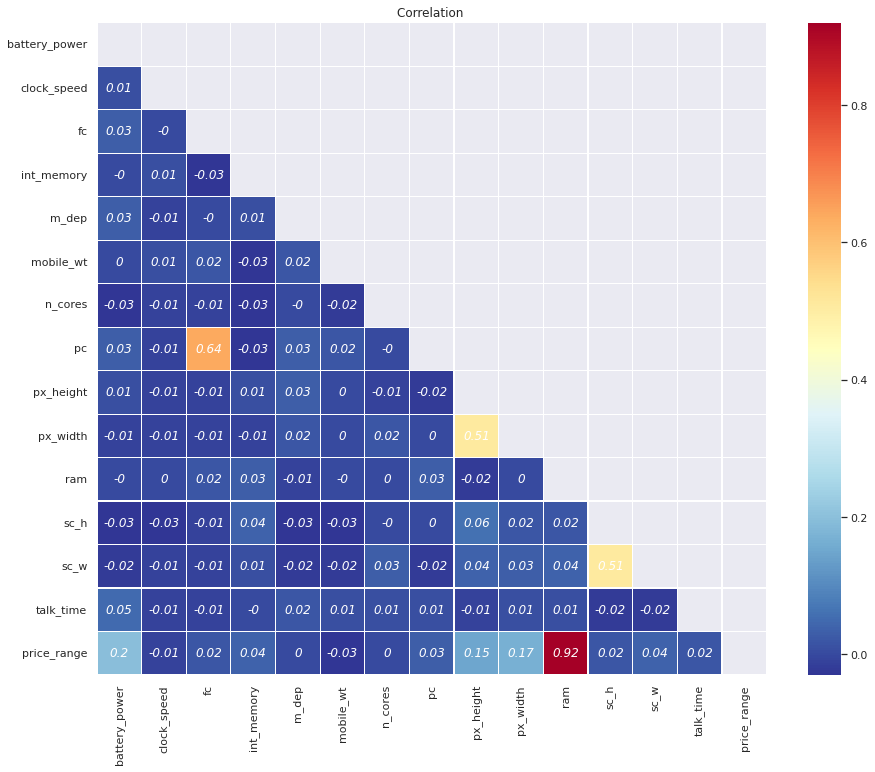

In [ ]:
corr=train.corr().round(2)
fig = plt.figure(figsize=(15,12))
mask = np.triu(np.ones_like(corr))
# mask = mask > 0.4
r = sns.heatmap(corr,
                cmap="RdYlBu_r",
                annot=True,
                annot_kws = {'fontsize':12, 
                             'fontstyle':'italic', 
                             'color':'w',
                             'verticalalignment':'center'},
                mask=mask,
                linewidth =.2)
r.set_title("Correlation ")

**Nhận xét:**
-  Độ tương qua giữa Ram và mức giá là rất lớn (0.92) 

**Phương pháp:**
- Ram là tham chiếu để Visualize với các đặc trưng khác.

In [ ]:
convert_type(train,['price_range'],'category')

### 1.4.2 Some plot

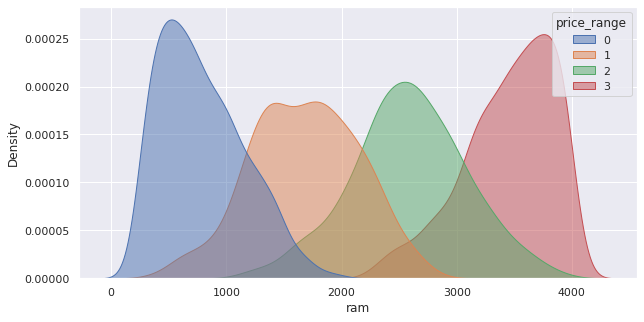

In [ ]:
plt.figure(figsize=(10,5))
sns.kdeplot(data= train, x='ram', hue='price_range',fill=True,alpha=.5, linewidth=1)

Text(0.5, 1.0, 'Battery and Ram follows Price')

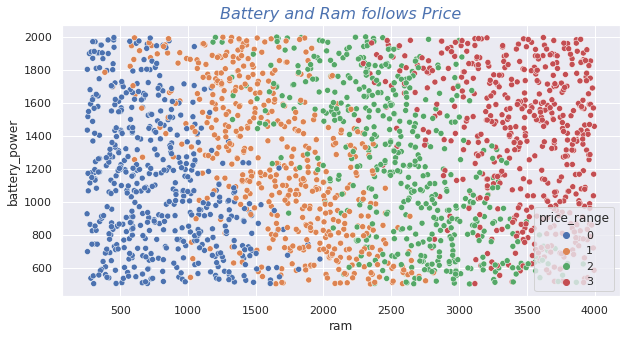

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(data= train, x= 'ram', y= 'battery_power', hue='price_range')
plt.title("Battery and Ram follows Price",c='b',style="oblique",size=16)

Text(0.5, 1.0, 'Primary Cam and Ram follows Price')

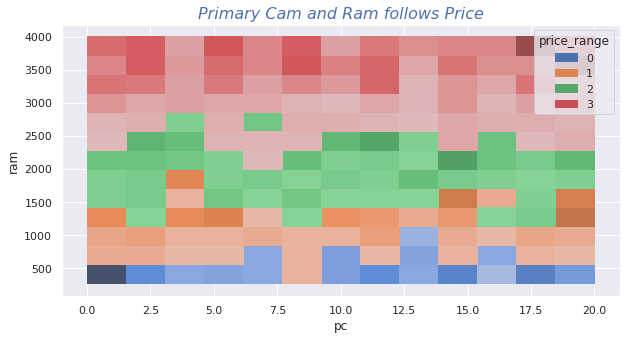

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(data= train, x= 'pc', y= 'ram', hue='price_range')
plt.title("Primary Cam and Ram follows Price",c='b',style="oblique",size=16)

**Nhận xét:** 
- Khi hiển thị các feature(battery,pc) với cột ram cho thấy có sự phân lớp đặc biệt là battery

- Tuy nhiên những sự phân lớp này chưa rời rạc

**Phương pháp:** Có thể sử dụng các đặc trưng này để tiến hành training để đối chiếu kết quả với toàn bộ datasset



## 1.5 Grid Search (Tìm thông số tối ưu)

In [ ]:
!pip install pipelinehelper -q


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold


from sklearn.preprocessing import Normalizer,StandardScaler,MaxAbsScaler,FunctionTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import sklearn


from sklearn.pipeline import Pipeline
from pipelinehelper import PipelineHelper

import warnings
warnings.filterwarnings("ignore")

In [ ]:
## Pipeline params


params = {}
params["data_split_train"] = 0.7
params['random_state'] = 54
params['k_fold'] = 3
 


In [ ]:
pipe = Pipeline([
    ('scaler', PipelineHelper([
        ('std', StandardScaler()),
        ('normal', Normalizer()),
        ('non', FunctionTransformer())
    ])),
    ('classifier', PipelineHelper([
        ('svm', SVC()),
        ('lr', LogisticRegression()),
        ('knn', KNeighborsClassifier())

    ])),
])

# Các cấu hình thử nghiệm
parameters = {
    'scaler__selected_model': pipe.named_steps['scaler'].generate({
        'std__with_mean': [True],
        'std__with_std': [False],

        'normal__norm': ['l1','l2','max']
    }),
    'classifier__selected_model': pipe.named_steps['classifier'].generate({
        # 'svm__C': [1.0, 10.0],
        # 'svm__kernel': ['linear','poly','rbf','sigmoid'],
        # 'svm__degree': [2,3,5,6,10],


        'lr__fit_intercept': [True,False],
        'lr__solver': ['saga','liblinear','newton-cg'],
        'lr__max_iter': [500,1000],

        # 'knn__n_neighbors' : [5,10,15,20,25,30],
        # 'knn__leaf_size': [20,25,30,35,40]
      
    })
}
# Lựa chọn cấu hình: kiểm thử chéo (chia X_train thành 5 phần)
grid = GridSearchCV(pipe, parameters, cv=params['k_fold'], scoring='accuracy',verbose=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train.iloc[:,0:-1],
                                                    train.iloc[:,-1],
                                                    random_state=params["random_state"],
                                                    train_size=params['data_split_train'])

In [ ]:
#Fit and train model
grid.fit(X_train, y_train)

print("-"*80)
print("Cấu hình tốt nhất: ", grid.best_params_)
print("Độ chính xác: {:6.2f}".format(grid.score(X_test, y_test)))

Fitting 3 folds for each of 70 candidates, totalling 210 fits
--------------------------------------------------------------------------------
Cấu hình tốt nhất:  {'classifier__selected_model': ('lr', {'fit_intercept': True, 'max_iter': 500, 'solver': 'newton-cg'}), 'scaler__selected_model': ('std', {'with_mean': True, 'with_std': False})}
Độ chính xác:   0.97


## 1.6 Đánh giá mô hình với tham số tối ưu (Thực nghiệm 1)

Ma trận nhầm lẫn: 
[[145   2   0   0]
 [  5 148   3   0]
 [  0   5 142   3]
 [  0   0   2 145]]


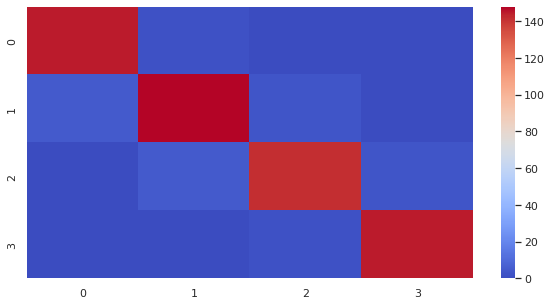

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Dự báo cho dữ liệu trong tập "kiểm tra" 
y_pred = grid.predict(X_test)

# Tính các độ đo
cmatrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,5))
sns.heatmap(cmatrix,cmap='coolwarm')

print("Ma trận nhầm lẫn: ")
print(cmatrix)

In [ ]:
# Tổng quan kết quả
metric_score = classification_report(y_test, y_pred)
print(metric_score)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       147
           1       0.95      0.95      0.95       156
           2       0.97      0.95      0.96       150
           3       0.98      0.99      0.98       147

    accuracy                           0.97       600
   macro avg       0.97      0.97      0.97       600
weighted avg       0.97      0.97      0.97       600



In [ ]:
from sklearn.metrics import precision_recall_fscore_support
scores = precision_recall_fscore_support(y_test, y_pred, average='macro')
accuracy = metrics.accuracy_score(y_test, y_pred, normalize=True)

In [ ]:
# Kết quả
print("Độ chính xác (precision): {:7.2f}%".format(scores[0]*100))
print("Độ triệu hồi (recall): {:7.2f}%".format(scores[1]*100))
print("Độ đo F1 (F1-measure): {:7.2f}%".format(scores[2]*100))
print("Độ chính xác (accuracy): {:7.2f}%".format(accuracy*100))

Độ chính xác (precision):   96.68%
Độ triệu hồi (recall):   96.70%
Độ đo F1 (F1-measure):   96.69%
Độ chính xác (accuracy):   96.67%


In [ ]:
results = {}
results['all'] = [scores[0]*100,scores[1]*100,scores[2]*100,accuracy*100]

# 2. Advanced
## Ở bước hiển thị dữ liệu (1.4.2) ta thấy rằng các đặc trưng tách biệt khá tốt vì thế ở phần này chúng ta tiến hành các thực nghiệm sau



### 2.1 Using only ram & battery


Text(0.5, 1.0, 'Battery and Ram follows Price')

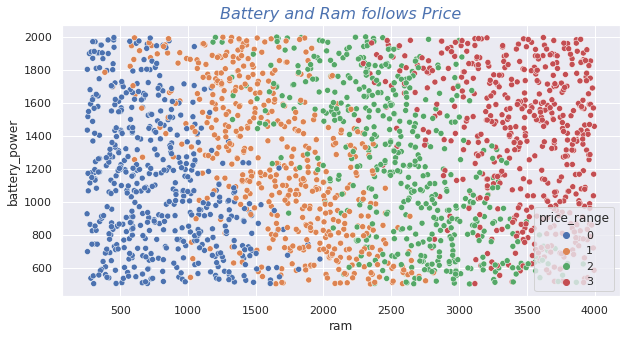

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(data= train, x= 'ram', y= 'battery_power', hue='price_range')
plt.title("Battery and Ram follows Price",c='b',style="oblique",size=16)

In [ ]:
rb_train = train[['battery_power','ram','price_range']]
rb_test = test[['battery_power','ram']]


In [ ]:
#Train valid split
X_train, X_test, y_train, y_test = train_test_split(rb_train.iloc[:,0:-1],
                                                    rb_train.iloc[:,-1],
                                                    random_state=params["random_state"],
                                                    train_size=params['data_split_train'])


In [ ]:

grid1 = GridSearchCV(pipe, parameters, cv= 2, scoring='accuracy',verbose=1)

#Fit
grid1.fit(X_train, y_train)

y_pred = grid1.predict(X_test)

print("-"*80)
print("Cấu hình tốt nhất: ", grid.best_params_)
print("Độ chính xác: {:6.2f}".format(grid1.score(X_test, y_test)))

Fitting 2 folds for each of 70 candidates, totalling 140 fits
--------------------------------------------------------------------------------
Cấu hình tốt nhất:  {'classifier__selected_model': ('lr', {'fit_intercept': True, 'max_iter': 500, 'solver': 'newton-cg'}), 'scaler__selected_model': ('std', {'with_mean': True, 'with_std': False})}
Độ chính xác:   0.80


In [ ]:
# Kết quả
scores = precision_recall_fscore_support(y_test, y_pred, average='macro')
accuracy = metrics.accuracy_score(y_test, y_pred, normalize=True)
print("Độ chính xác (precision): {:7.2f}%".format(scores[0]*100))
print("Độ triệu hồi (recall): {:7.2f}%".format(scores[1]*100))
print("Độ đo F1 (F1-measure): {:7.2f}%".format(scores[2]*100))
print("Độ chính xác (accuracy): {:7.2f}%".format(accuracy*100))

Độ chính xác (precision):   79.96%
Độ triệu hồi (recall):   80.30%
Độ đo F1 (F1-measure):   80.07%
Độ chính xác (accuracy):   80.17%


In [ ]:
results['ram & battery'] = [scores[0]*100,scores[1]*100,scores[2]*100,accuracy*100]


**Kết quả:** Kết quả cho thấy khi chỉ sử dụng battery và ram cho kết quả khá cao (accuracy: 80,5) tuy nhiên vẫn thấp hơn nhiều so với khi sử dụng toàn bộ dataset (accuracy: 96,6%)

**Cấu hình tốt nhất:**
{'classifier__selected_model': ('lr', {'fit_intercept': True, 'max_iter': 500, 'solver': 'newton-cg'}), 'scaler__selected_model': ('std', {'with_mean': True, 'with_std': False})}

**Độ chính xác:   0.80**

### 2.2 Using only px_width & ram

In [ ]:
pr_train = train[['px_width','ram','price_range']]
pr_test = test[['px_width','ram']]

#Train valid split
X_train, X_test, y_train, y_test = train_test_split(pr_train.iloc[:,0:-1], 
                                                    rb_train.iloc[:,-1],
                                                    random_state=params["random_state"],
                                                    train_size=params['data_split_train'])

grid2 = GridSearchCV(pipe, parameters, cv=params['k_fold'], scoring='accuracy',verbose=1)

#Fit
grid2.fit(X_train, y_train)
y_pred = grid2.predict(X_test)
print("-"*80)
print("Cấu hình tốt nhất: ", grid2.best_params_)
print("Độ chính xác: {:6.2f}".format(grid2.score(X_test, y_test)))

Fitting 3 folds for each of 70 candidates, totalling 210 fits
--------------------------------------------------------------------------------
Cấu hình tốt nhất:  {'classifier__selected_model': ('svm', {}), 'scaler__selected_model': ('std', {'with_mean': True, 'with_std': False})}
Độ chính xác:   0.74


In [ ]:
# Kết quả
scores = precision_recall_fscore_support(y_test, y_pred, average='macro')
accuracy = metrics.accuracy_score(y_test, y_pred, normalize=True)
print("Độ chính xác (precision): {:7.2f}%".format(scores[0]*100))
print("Độ triệu hồi (recall): {:7.2f}%".format(scores[1]*100))
print("Độ đo F1 (F1-measure): {:7.2f}%".format(scores[2]*100))
print("Độ chính xác (accuracy): {:7.2f}%".format(accuracy*100))

Độ chính xác (precision):   74.37%
Độ triệu hồi (recall):   74.63%
Độ đo F1 (F1-measure):   74.45%
Độ chính xác (accuracy):   74.50%


In [ ]:
results['ram & px_width'] = [scores[0]*100,scores[1]*100,scores[2]*100,accuracy*100]


**Nhận xét:** Khi chỉ sử dụng cột px_width và ram chỉ cho ra kết quả tương đối (accuracy 75,3%)

## 2.3 Results


In [ ]:
df_results = pd.DataFrame.from_dict(results)
df_results['index'] =  ['precision','recall','f1-score','accuracy']
df_results
df_results.set_index('index')


,all,ram & battery,ram & px_width
index,,,
precision,96.680538,79.960548,74.372942
recall,96.704343,80.301413,74.628205
f1-score,96.686982,80.068385,74.450471
accuracy,96.666667,80.166667,74.500000


**Nhận xét:** 
- Khi chỉ sử dụng 2 feature ram và (battery or px_width) cho ta kết quả thấp hơn khi dùng toàn bộ dữ liệu
- Tuy nhiên kết quả khi chỉ sử dụng ram & battery cho ra kết quả rất tiềm năng (accuracy: 81,5%)

**Phương pháp:** Có thể kết hợp ram & battery cùng một số đặc trưng có độ tương qua với outcome lớn (px_height, px_with, int_memory) sẽ cho ra kết quả tốt hơn

## 2.4 Plot boudary

In [ ]:
!pip install mlxtend  

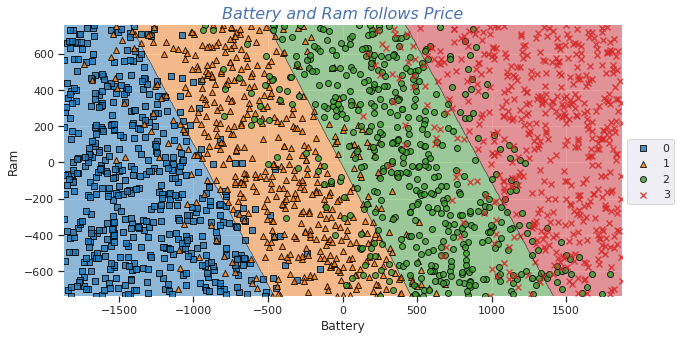

In [ ]:
from mlxtend.plotting import plot_decision_regions


X = rb_train[['ram','battery_power']]
y = np.array(rb_train['price_range'])



scaler = StandardScaler(with_mean = True, with_std= False)
X = scaler.fit_transform(X)

# Training a classifier
clf = LogisticRegression(fit_intercept= True, max_iter= 500, solver= 'newton-cg')
clf.fit(X, y)


# Plotting decision regions
sns.set()
plt.figure(figsize=(10,5))

plot_decision_regions(X, y, clf=clf)

# Adding axes annotations
plt.title("Battery and Ram follows Price",c='b',style="oblique",size=16)
plt.xlabel('Battery')
plt.ylabel('Ram')

plt.legend(bbox_to_anchor=(1, 0.6))
plt.show()

**Nhận xét:** Khi kết hợp đặc trưng Ram và Battery ta có thể thấy độ phân tách của class khá tốt  đặc biệt là lớp 0 và 3

#Summary 🦖
- Lab1: Tìm hiểu và hiển thị data
  - Dataset về thông số của điện thoại dùng để phân lớp mức giá
  - Gồm 2000 mẫu và 19 đặc trưng (non-null)
  - Các đặc trưng có tương quan lớn với class (ram, battery, px_width)
  - Dùng GridSearch tìm mô hình và params tối ưu
  ==> Thử nghiệm: chỉ sử dụng một số đặc trưng tốt tiến hành phân lớp.
    
    ---> Kết quả: Kết quả không tốt bằng khi sử dụng toàn bộ dataset

---------------------------------------------
